In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

2024-02-20 15:18:56.948791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 15:18:56.948907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 15:18:57.096091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the data
train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')

In [3]:
# Preprocessing
# Encode categorical variables
label_encoders = {}
for col in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le


In [4]:
# Split features and target variable
X = train_df.drop(['id', 'NObeyesdad'], axis=1)
y = train_df['NObeyesdad']


In [5]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# One-hot encode the target variable
y_encoded = pd.get_dummies(y)


In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [8]:
# Model Building
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=2)


Epoch 1/50
260/260 - 2s - loss: 1.6242 - accuracy: 0.3614 - val_loss: 1.0292 - val_accuracy: 0.5689 - 2s/epoch - 7ms/step
Epoch 2/50
260/260 - 1s - loss: 1.0828 - accuracy: 0.5454 - val_loss: 0.7954 - val_accuracy: 0.6712 - 586ms/epoch - 2ms/step
Epoch 3/50
260/260 - 1s - loss: 0.9277 - accuracy: 0.6010 - val_loss: 0.6803 - val_accuracy: 0.7300 - 510ms/epoch - 2ms/step
Epoch 4/50
260/260 - 1s - loss: 0.8226 - accuracy: 0.6502 - val_loss: 0.5961 - val_accuracy: 0.7750 - 558ms/epoch - 2ms/step
Epoch 5/50
260/260 - 1s - loss: 0.7639 - accuracy: 0.6845 - val_loss: 0.5497 - val_accuracy: 0.8254 - 555ms/epoch - 2ms/step
Epoch 6/50
260/260 - 1s - loss: 0.7108 - accuracy: 0.7097 - val_loss: 0.5119 - val_accuracy: 0.8516 - 555ms/epoch - 2ms/step
Epoch 7/50
260/260 - 1s - loss: 0.6865 - accuracy: 0.7217 - val_loss: 0.4916 - val_accuracy: 0.8403 - 507ms/epoch - 2ms/step
Epoch 8/50
260/260 - 0s - loss: 0.6547 - accuracy: 0.7374 - val_loss: 0.4786 - val_accuracy: 0.8562 - 497ms/epoch - 2ms/step
Epo

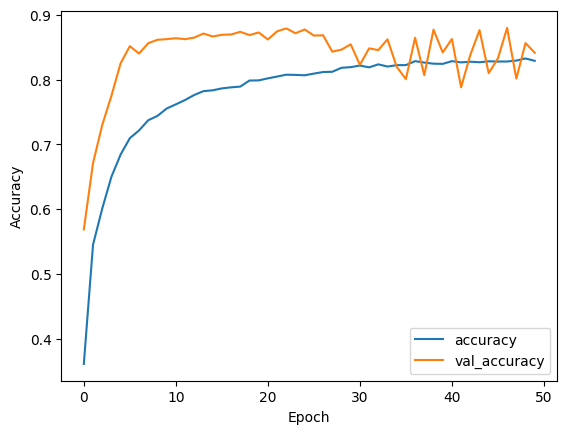

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [11]:
# Model Evaluation
# Predictions on validation set
y_pred_proba = model.predict(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)

130/130 [==============================] - 0s 1ms/step


In [12]:
# Convert one-hot encoded y_val back to categorical
y_val_categorical = np.argmax(np.array(y_val), axis=1)


In [13]:
# Accuracy
accuracy = accuracy_score(y_val_categorical, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8415221579961464


In [14]:
# Classification Report
print(classification_report(y_val_categorical, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.52      0.68       524
           1       0.65      0.92      0.76       626
           2       0.86      0.84      0.85       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.76      0.74      0.75       484
           6       0.75      0.76      0.75       514

    accuracy                           0.84      4152
   macro avg       0.85      0.82      0.82      4152
weighted avg       0.86      0.84      0.84      4152



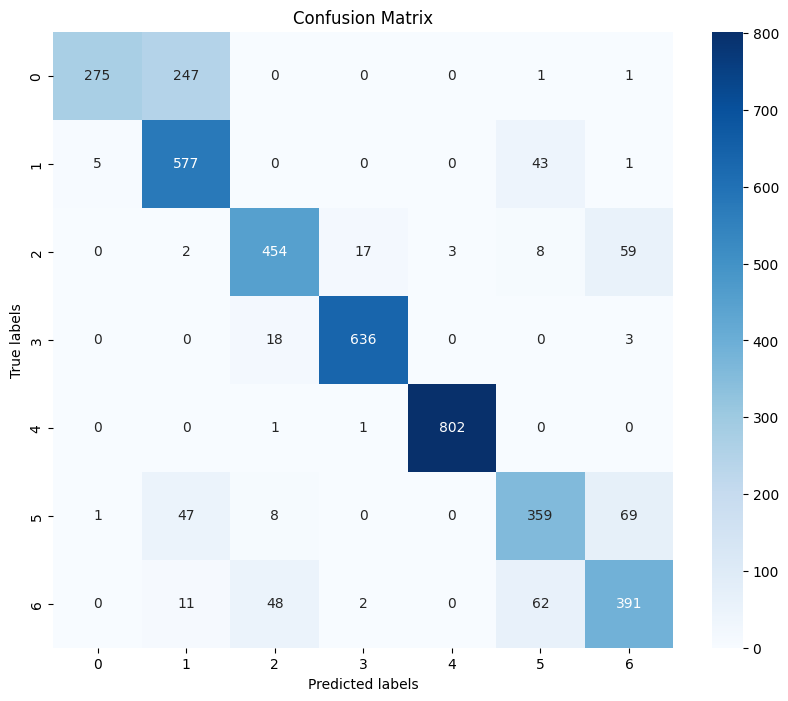

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_val_categorical, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Initialize label encoders with handle_unknown='ignore'
label_encoders = {}
for col in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder(handle_unknown='ignore')  # Add handle_unknown='ignore' parameter here
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Preprocessing test data
test_ids = test_df['id']  # Assuming 'id' column exists in the test data
for col, le in label_encoders.items():
    test_df[col] = le.transform(test_df[col])

In [17]:
# One-hot encode categorical features in the test data
test_df_encoded = pd.get_dummies(test_df, columns=test_df.select_dtypes(include=['object']).columns)

# Align the columns of the test set with the training set
test_df_aligned = test_df_encoded.reindex(columns=train_df.columns, fill_value=0)


In [18]:
# Exclude 'id' and 'NObeyesdad' columns from the test data
test_df_features = test_df_aligned.drop(['id', 'NObeyesdad'], axis=1)

In [19]:
# Scaling test data
test_scaled = scaler.transform(test_df_features)


In [20]:
# Making predictions on test data
test_predictions_proba = model.predict(test_scaled)
test_predictions = np.argmax(test_predictions_proba, axis=1)


433/433 [==============================] - 1s 1ms/step


In [21]:
# Creating submission file
submission_df = pd.DataFrame({'id': test_ids, 'NObeyesdad': test_predictions})
submission_df.to_csv('submission.csv', index=False)